In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing all the libraries used in the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

In [3]:
# importing data and reading it
pd.options.display.max_columns=None
bank = pd.read_csv('/kaggle/input/bank-fullcsv/bank-full.csv')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#### **EDA**

In [4]:
# counting null values of every column
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
# checking datatypes and null values in each columns
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
# shape of data
bank.shape

(45211, 17)

In [7]:
# statistical aspects of the dataframe
bank.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


---
#### **Manipulating data**

Changing all the **yes** and **no** columns to 1 and 0.

In [8]:
# list of variables which needs to be changed
col = ['default','housing','loan','y']

# function definition
def convert(x):
    return x.map({'yes':1,'no':0})

# calling the function
bank[col] = bank[col].apply(convert)

In [9]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


---
### Count of the every categorical variable present in the data

In [10]:
# count of column job
bank['job'].astype("category").value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [11]:
# count of column marital
bank['marital'].astype("category").value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [12]:
# count of column education
bank['education'].astype("category").value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [13]:
# count of column contact
bank['contact'].astype("category").value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [14]:
# count of column month
bank['month'].astype("category").value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [15]:
# count of column poutcome
bank['poutcome'].astype("category").value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

---
### Making dataframe of all the categorical columns to make dummy variables for all these categorical variables.

In [16]:
categorical = bank.select_dtypes(include=['object'])
categorical.head()

,job,marital,education,contact,month,poutcome
0,management,married,tertiary,unknown,may,unknown
1,technician,single,secondary,unknown,may,unknown
2,entrepreneur,married,secondary,unknown,may,unknown
3,blue-collar,married,unknown,unknown,may,unknown
4,unknown,single,unknown,unknown,may,unknown


In [17]:
# dummy variables of all categorical columns
dummies = pd.get_dummies(categorical,drop_first=True)
dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [18]:
# concatination of two dataframes 'bank' and 'dummies'
bank = pd.concat([bank,dummies],axis=1)
bank.drop(columns=categorical.columns,axis=1,inplace=True)

In [19]:
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [20]:
bank.shape

(45211, 43)

In [21]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_blue-collar      45211 non-null  uint8
 12  job_entrepreneur     45211 non-null  uint8
 13  job_housemaid        45211 non-null  uint8
 14  job_management       45211 non-null  uint8
 15  job_retired          45211 non-null  uint8
 16  job_self-employed    4

#####  Now we have 43 columns in the dataframe on which we need to perform the analysis and make prediction model

---
## Checking outliers

Collecting the columns with continuous values in the dataframe and checking outliers for it

In [22]:
# collecting all the continuous valued columns in a dataframe
check_out = bank[['age','balance','day','duration','campaign','pdays','previous']]
check_out.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [23]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
check_out.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
90%,56.000000,3574.000000,28.000000,548.000000,5.000000,185.000000,2.000000
95%,59.000000,5768.000000,29.000000,751.000000,8.000000,317.000000,3.000000
99%,71.000000,13164.900000,31.000000,1269.000000,16.000000,370.000000,8.900000


<AxesSubplot: ylabel='previous'>

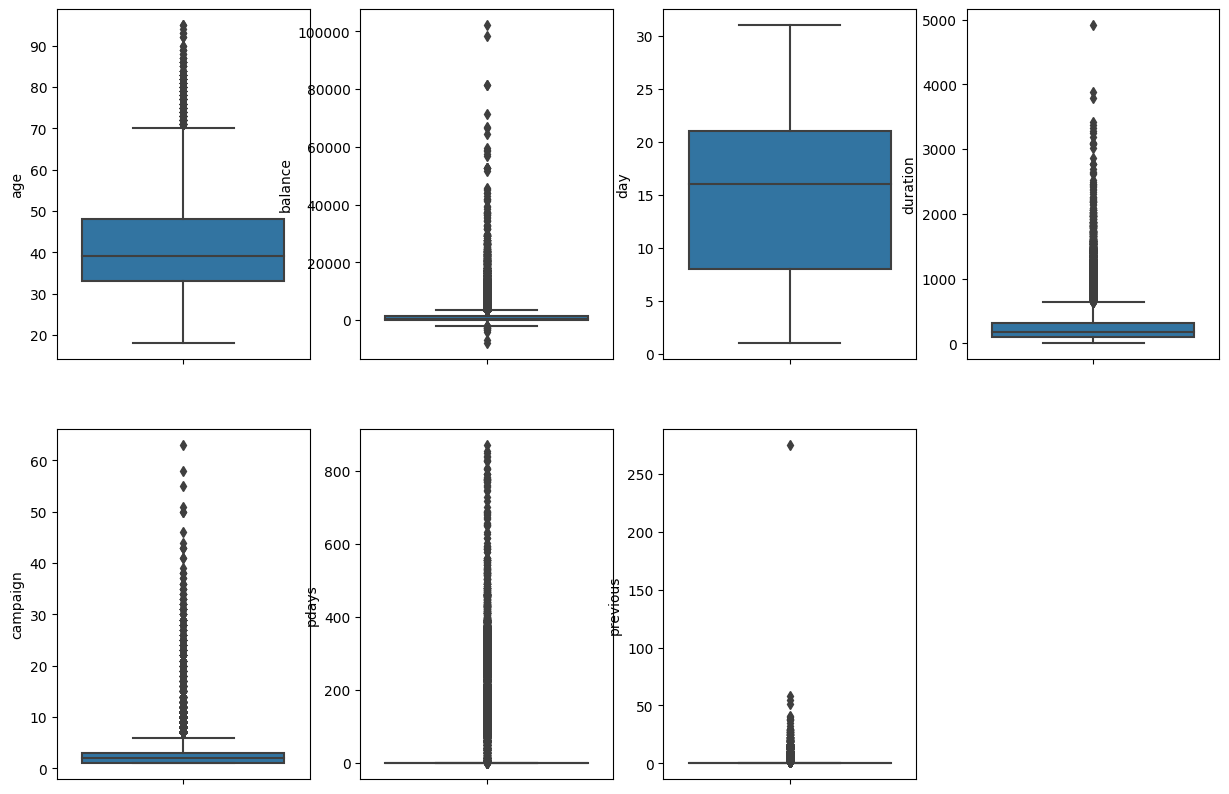

In [24]:
# creating boxplots for all the continuous columns of the dataframe
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='age',data=bank)
plt.subplot(2,4,2)
sns.boxplot(y='balance',data=bank)
plt.subplot(2,4,3)
sns.boxplot(y='day',data=bank)
plt.subplot(2,4,4)
sns.boxplot(y='duration',data=bank)
plt.subplot(2,4,5)
sns.boxplot(y='campaign',data=bank)
plt.subplot(2,4,6)
sns.boxplot(y='pdays',data=bank)
plt.subplot(2,4,7)
sns.boxplot(y='previous',data=bank)

##### There are lot of outliers present in the dataframe but we can't drop them because of the very large quantity and are important for model making
---

<AxesSubplot: >

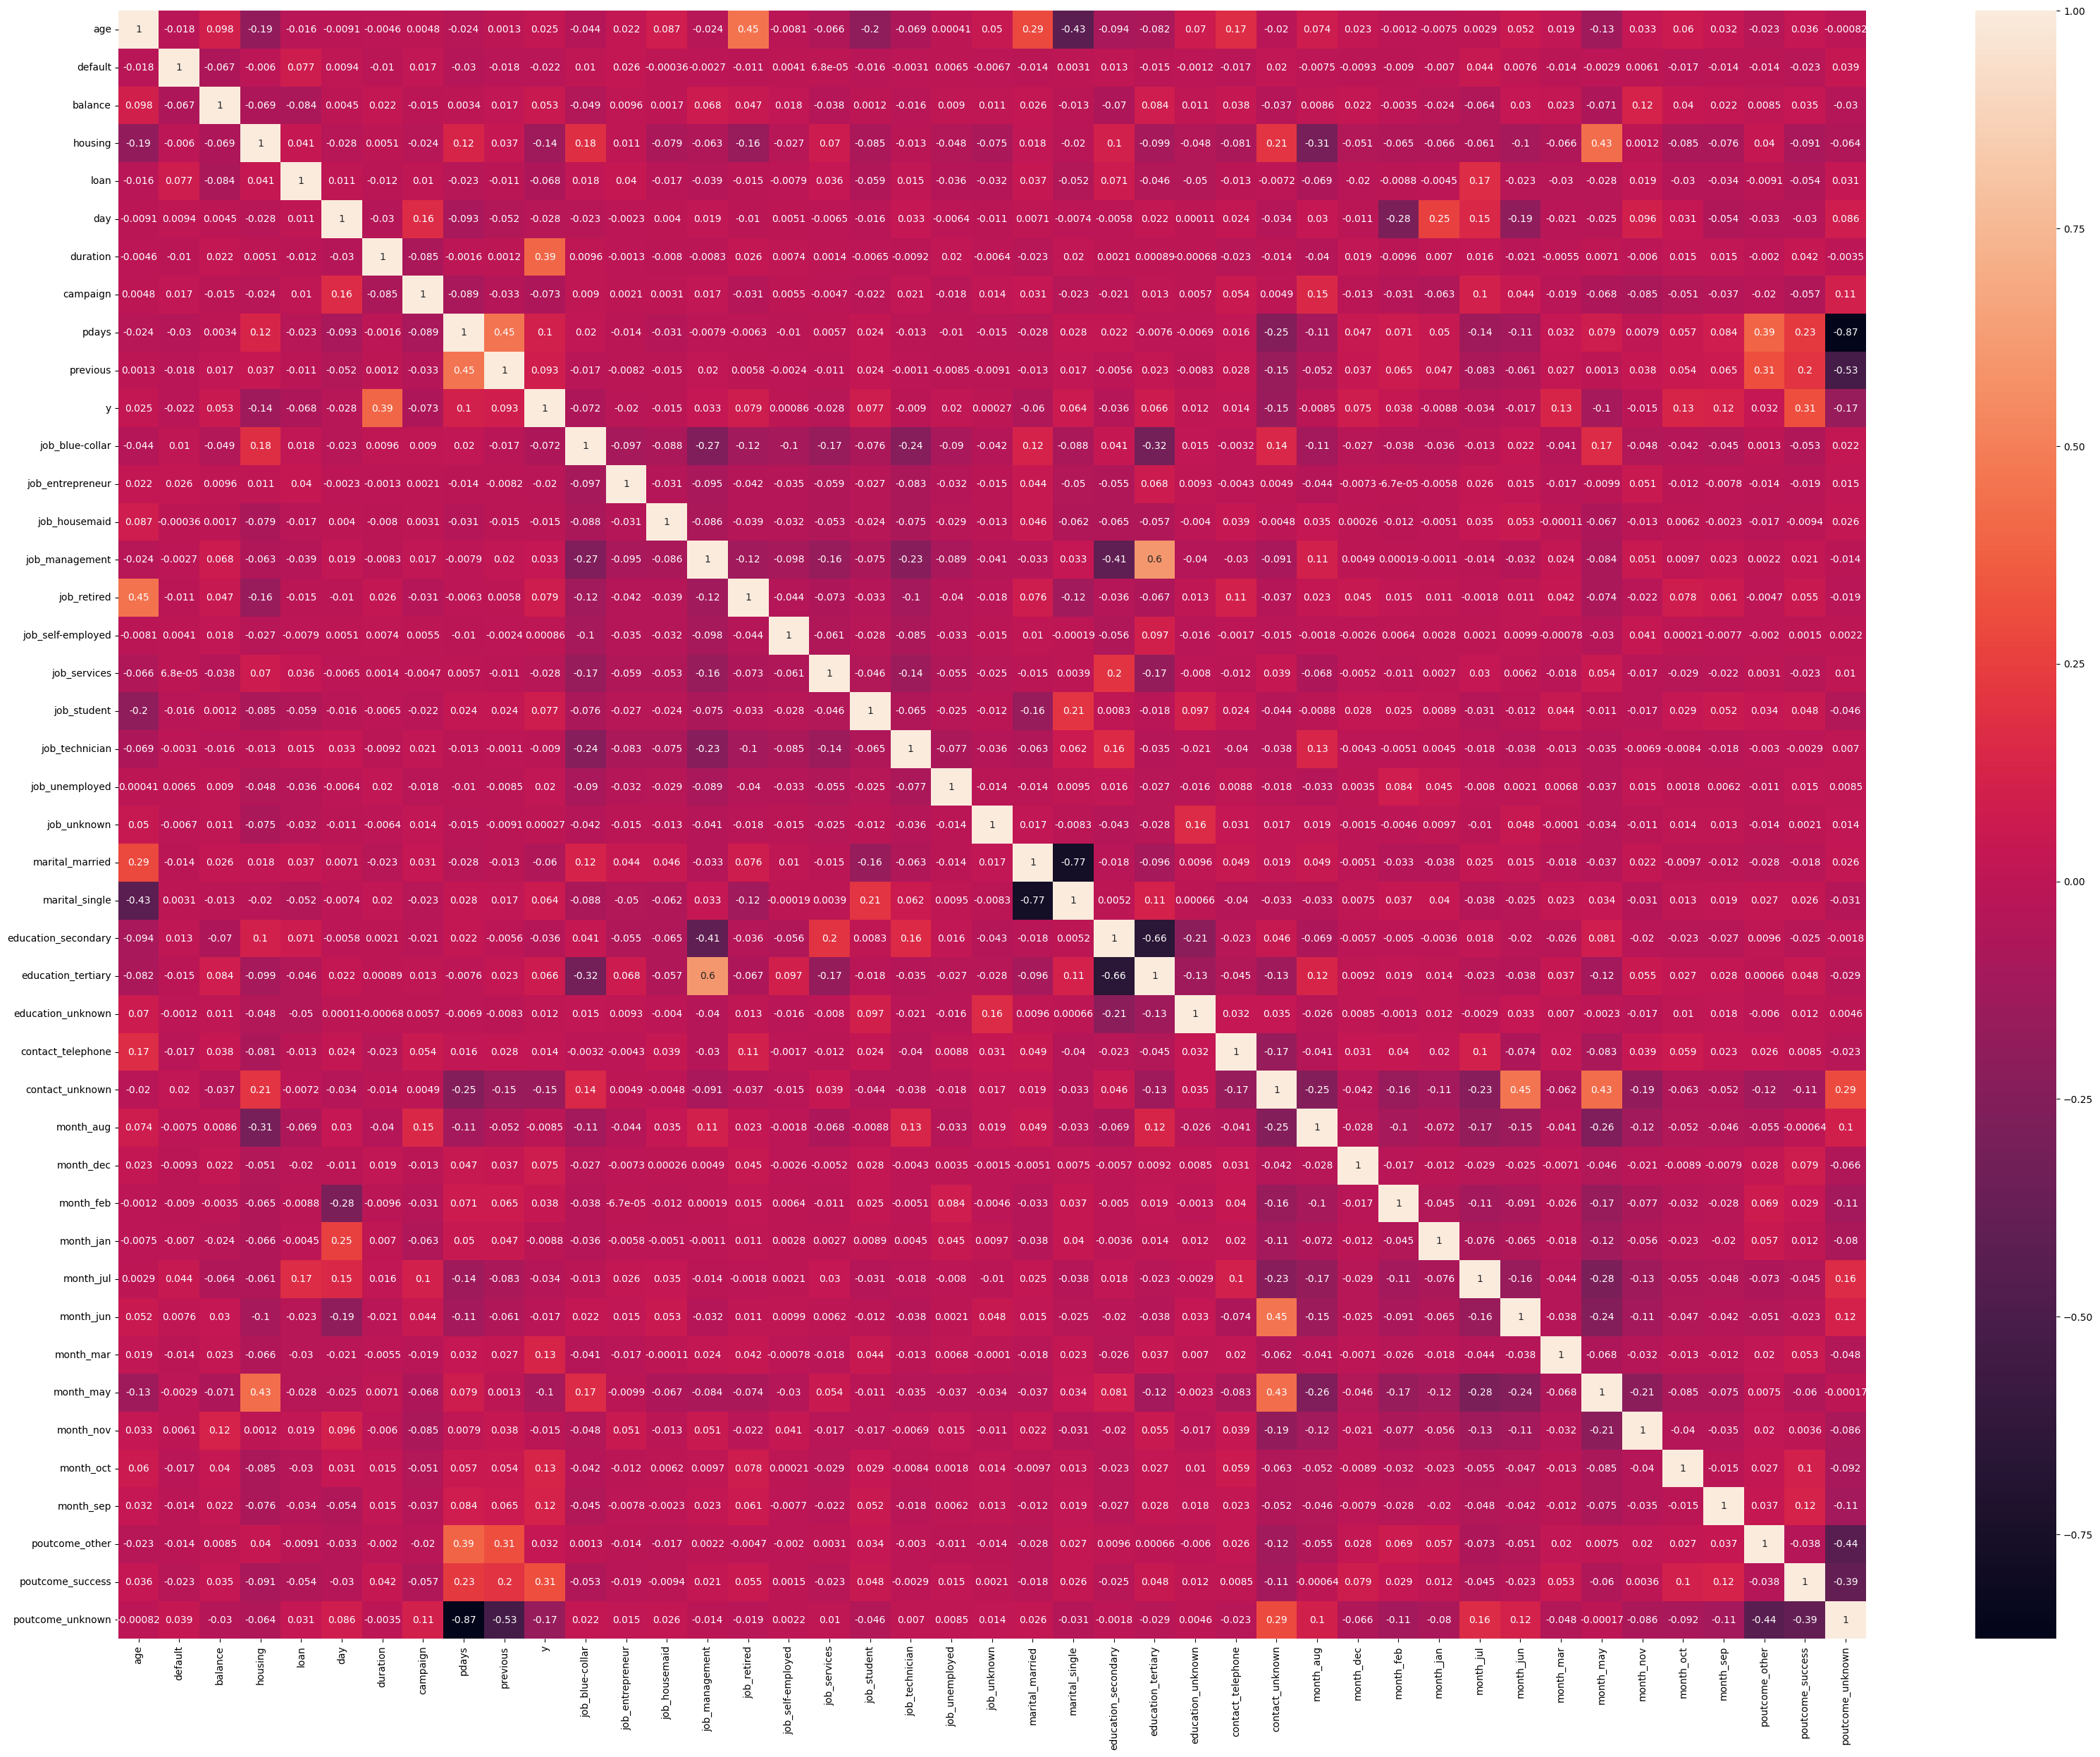

In [25]:
# Making a heatmap to find correlation
plt.figure(figsize=(40,30))
sns.heatmap(bank.corr(),annot=True)

##### We are not gonna drop any column because none of the column is very highly correlated with the target column
---

In [26]:
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [27]:
# subscription rate
round((sum(bank['y'])/len(bank.index))*100,2)

11.7

##### This shows that approximately 12% people are subscribed to the bank term deposit

---
##### Splitting the target variable and the predictor features in two different dataframes from Train Test Split 

In [28]:
# X will have all the features
X = bank.drop(['y'],1)
# Y will have the target variable
Y = bank['y']

In [29]:
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [30]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

---
## Step 3: Train Test Split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

##### Splitting the data in train and test dataframe in the ratio of 7:3


---
## Step 4: Feature Scaling

In [32]:
scaler = StandardScaler()

x_train[['age','balance','day','duration','campaign','pdays','previous']] = scaler.fit_transform(x_train[['age','balance','day','duration','campaign','pdays','previous']])

In [33]:
x_train.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
18391,-0.087715,0,1.103100,0,0,1.824143,-0.093607,-0.251559,-0.412081,-0.237746,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
13056,-1.404878,0,-0.555004,0,1,-0.938821,-0.360990,-0.573232,-0.412081,-0.237746,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
13415,1.041282,0,0.655212,1,0,-0.818692,-0.248612,-0.573232,-0.412081,-0.237746,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
21022,-0.181798,0,-0.223447,0,0,-0.218048,0.150526,-0.251559,-0.412081,-0.237746,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
24510,0.853116,0,-0.172097,0,0,0.142339,-0.725251,-0.573232,0.977123,0.579851,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


---
## Step 5: Model Building

##### Buiding first logistic regression model 

In [34]:
# logistic regression model
logm = sm.GLM(y_train,(sm.add_constant(x_train)),family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31604
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7495.1
Date:                Fri, 19 May 2023   Deviance:                       14990.
Time:                        10:18:10   Pearson chi2:                 3.17e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2205
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.5776      0.164     -9.648      0.000      -1.898      -1.257
age                     0.0260      0.028      0.925      0.355      -0.029       0.081
default                -0.1470      0.208     -0.705      0.481      -0.556       0.262
balance                 0.0420      0.018      2.330      0.020       0.007       0.077
housing                -0.6830      0.053    -12.990      0.000      -0.786      -0.580
loan                   -0.4301      0.073     -5.913      0.000      -0.573      -0.288
day                     0.0827      0.025      3.332      0.001       0.034       0.131
duration                1.0871      0.020     54.354      0.000       1.048       1.126
campaign               -0.2476      0.036     -6.785      0.000      -0.319      -0.176
pdays                  -0.0542      0.038     -1.444      0.149      -0.128       0.019
previous                0.0161      0.016      1.023      0.306      -0.015       0.047
job_blue-collar        -0.1813      0.087     -2.080      0.037      -0.352      -0.010
job_entrepreneur       -0.3781      0.153     -2.476      0.013      -0.677      -0.079
job_housemaid          -0.4418      0.164     -2.702      0.007      -0.762      -0.121
job_management         -0.1388      0.089     -1.560      0.119      -0.313       0.036
job_retired             0.2457      0.117      2.094      0.036       0.016       0.476
job_self-employed      -0.3501      0.137     -2.553      0.011      -0.619      -0.081
job_services           -0.1662      0.101     -1.641      0.101      -0.365       0.032
job_student             0.4831      0.133      3.629      0.000       0.222       0.744
job_technician         -0.1814      0.084     -2.170      0.030      -0.345      -0.018
job_unemployed         -0.0547      0.134     -0.408      0.683      -0.317       0.208
job_unknown             0.0241      0.257      0.094      0.925      -0.479       0.527
marital_married        -0.1333      0.071     -1.866      0.062      -0.273       0.007
marital_single          0.1675      0.081      2.057      0.040       0.008       0.327
education_secondary     0.2867      0.078      3.665      0.000       0.133       0.440
education_tertiary      0.4671      0.091      5.110      0.000       0.288       0.646
education_unknown       0.2782      0.125      2.217      0.027       0.032       0.524
contact_telephone      -0.1836      0.089     -2.054      0.040      -0.359      -0.008
contact_unknown        -1.6908      0.089    -19.046      0.000      -1.865      -1.517
month_aug              -0.6770      0.094     -7.214      0.000      -0.861      -0.493
month_dec               0.7339      0.210      3.492      0.000       0.322       1.146
month_feb              -0.1288      0.107     -1.208      0.227      -0.338       0.080
mon

---
## Step 6: Feature Selection using RFE

In [35]:
logreg = LogisticRegression()

In [36]:
# Running RFE with 13 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(x_train,y_train)

In [37]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('age', False, 21),
 ('default', False, 9),
 ('balance', False, 20),
 ('housing', True, 1),
 ('loan', True, 1),
 ('day', False, 17),
 ('duration', True, 1),
 ('campaign', False, 5),
 ('pdays', False, 18),
 ('previous', False, 23),
 ('job_blue-collar', False, 13),
 ('job_entrepreneur', False, 3),
 ('job_housemaid', False, 2),
 ('job_management', False, 16),
 ('job_retired', True, 1),
 ('job_self-employed', False, 8),
 ('job_services', False, 14),
 ('job_student', True, 1),
 ('job_technician', False, 15),
 ('job_unemployed', False, 19),
 ('job_unknown', False, 22),
 ('marital_married', False, 6),
 ('marital_single', False, 11),
 ('education_secondary', True, 1),
 ('education_tertiary', True, 1),
 ('education_unknown', True, 1),
 ('contact_telephone', False, 10),
 ('contact_unknown', True, 1),
 ('month_aug', True, 1),
 ('month_dec', True, 1),
 ('month_feb', False, 7),
 ('month_jan', True, 1),
 ('month_jul', True, 1),
 ('month_jun', True, 1),
 ('month_mar', True, 1),
 ('month_may', True, 

In [38]:
col1 = x_train.columns[rfe.support_]
col1

Index(['housing', 'loan', 'duration', 'job_retired', 'job_student',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_unknown', 'month_aug', 'month_dec', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_success'],
      dtype='object')

In [39]:
x_train.columns[~rfe.support_]

Index(['age', 'default', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_self-employed', 'job_services', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'contact_telephone', 'month_feb', 'poutcome_other', 'poutcome_unknown'],
      dtype='object')

##### Assessing the model with StatsModels

In [40]:
x_train_sm = sm.add_constant(x_train[col1])
logm1 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31626
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7567.6
Date:                Fri, 19 May 2023   Deviance:                       15135.
Time:                        10:18:14   Pearson chi2:                 3.44e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2169
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.0106      0.085    -23.572      0.000      -2.178      -1.843
housing                -0.6871      0.050    -13.606      0.000      -0.786      -0.588
loan                   -0.4629      0.072     -6.413      0.000      -0.604      -0.321
duration                1.0844      0.020     54.779      0.000       1.046       1.123
job_retired             0.4126      0.083      4.960      0.000       0.250       0.576
job_student             0.7642      0.114      6.729      0.000       0.542       0.987
education_secondary     0.3750      0.073      5.148      0.000       0.232       0.518
education_tertiary      0.5722      0.076      7.504      0.000       0.423       0.722
education_unknown       0.3551      0.121      2.925      0.003       0.117       0.593
contact_unknown        -1.7406      0.085    -20.359      0.000      -1.908      -1.573
month_aug              -0.7703      0.076    -10.102      0.000      -0.920      -0.621
month_dec               0.7669      0.203      3.769      0.000       0.368       1.166
month_jan              -1.1769      0.140     -8.386      0.000      -1.452      -0.902
month_jul              -0.8858      0.078    -11.314      0.000      -1.039      -0.732
month_jun               0.4955      0.097      5.082      0.000       0.304       0.687
month_mar               1.5668      0.139     11.292      0.000       1.295       1.839
month_may              -0.3469      0.074     -4.675      0.000      -0.492      -0.201
month_nov              -0.7428      0.088     -8.406      0.000      -0.916      -0.570
month_oct               1.1103      0.120      9.283      0.000       0.876       1.345
month_sep               0.9653      0.132      7.314      0.000       0.707       1.224
poutcome_success        2.4348      0.078     31.315      0.000       2.282       2.587
=======================================================================================
"""

In [41]:
# predicted values of the train dataset giving the probability
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

18391    0.067678
13056    0.033061
13415    0.036231
21022    0.114508
24510    0.048902
14062    0.008990
16250    0.033488
16330    0.026527
35883    0.062011
12306    0.030125
dtype: float64

In [42]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06767835, 0.0330609 , 0.0362306 , 0.11450802, 0.0489018 ,
       0.0089897 , 0.03348761, 0.02652694, 0.06201109, 0.03012507])

---
##### Creating the dataframe with the actual subscription flag and the predicted probabilities

In [43]:
y_train_pred_final = pd.DataFrame({'Sub':y_train.values,'Sub_prob':y_train_pred})
y_train_pred_final['Cust_id'] = y_train.index
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,0,0.067678,18391
1,0,0.033061,13056
2,0,0.036231,13415
3,0,0.114508,21022
4,0,0.048902,24510
5,0,0.008990,14062
6,0,0.033488,16250
7,0,0.026527,16330
8,0,0.062011,35883
9,0,0.030125,12306


##### Creating new column 'predict' with 1 if Sub_prob > 0.5 else 0

In [44]:
y_train_pred_final['predict'] = y_train_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
0,0,0.067678,18391,0
1,0,0.033061,13056,0
2,0,0.036231,13415,0
3,0,0.114508,21022,0
4,0,0.048902,24510,0
5,0,0.008990,14062,0
6,0,0.033488,16250,0
7,0,0.026527,16330,0
8,0,0.062011,35883,0
9,0,0.030125,12306,0


In [45]:
# creating confusion matrix for the following prediction
confusion = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.predict)
confusion

array([[27271,   666],
       [ 2402,  1308]])

##### Confusion Matrix
Actual/Predicted|Non Sub|Sub
----------------|-------|---
**Non Sub**|2726|59
**Sub**|260|119

In [46]:
print(metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.predict))

0.9030555818876986


##### The accuracy of the model is approximately 90% which is a really good model for prediction but we need to check the VIFs as well

---
### Checking VIFs for the selected 20 variables

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[col1].columns
vif['VIF'] = [variance_inflation_factor(x_train[col1].values,i) for i in range(x_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
15,month_may,3.60
5,education_secondary,3.00
8,contact_unknown,2.92
0,housing,2.71
13,month_jun,2.24
6,education_tertiary,2.15
12,month_jul,1.61
9,month_aug,1.54
16,month_nov,1.37
1,loan,1.23


##### There are no feature in the above VIF table whose value is greater than 5. So, there is no need to drop any of these features for proceeding to the prediction. 

##### But we need to check the p-values as well from the StatsModel to proceed further.

In [48]:
# Again creating StatsModel for checking p-values
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31626
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7567.6
Date:                Fri, 19 May 2023   Deviance:                       15135.
Time:                        10:18:15   Pearson chi2:                 3.44e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2169
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.0106      0.085    -23.572      0.000      -2.178      -1.843
housing                -0.6871      0.050    -13.606      0.000      -0.786      -0.588
loan                   -0.4629      0.072     -6.413      0.000      -0.604      -0.321
duration                1.0844      0.020     54.779      0.000       1.046       1.123
job_retired             0.4126      0.083      4.960      0.000       0.250       0.576
job_student             0.7642      0.114      6.729      0.000       0.542       0.987
education_secondary     0.3750      0.073      5.148      0.000       0.232       0.518
education_tertiary      0.5722      0.076      7.504      0.000       0.423       0.722
education_unknown       0.3551      0.121      2.925      0.003       0.117       0.593
contact_unknown        -1.7406      0.085    -20.359      0.000      -1.908      -1.573
month_aug              -0.7703      0.076    -10.102      0.000      -0.920      -0.621
month_dec               0.7669      0.203      3.769      0.000       0.368       1.166
month_jan              -1.1769      0.140     -8.386      0.000      -1.452      -0.902
month_jul              -0.8858      0.078    -11.314      0.000      -1.039      -0.732
month_jun               0.4955      0.097      5.082      0.000       0.304       0.687
month_mar               1.5668      0.139     11.292      0.000       1.295       1.839
month_may              -0.3469      0.074     -4.675      0.000      -0.492      -0.201
month_nov              -0.7428      0.088     -8.406      0.000      -0.916      -0.570
month_oct               1.1103      0.120      9.283      0.000       0.876       1.345
month_sep               0.9653      0.132      7.314      0.000       0.707       1.224
poutcome_success        2.4348      0.078     31.315      0.000       2.282       2.587
=======================================================================================
"""

##### We can see that some of the variables here have high p-values i.e. greater than 0.05. So we need to drop those features before moving ahead

In [49]:
# dropping column 'month_sep'
col1 = col1.drop('month_sep',1)
col1

Index(['housing', 'loan', 'duration', 'job_retired', 'job_student',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_unknown', 'month_aug', 'month_dec', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'poutcome_success'],
      dtype='object')

In [50]:
# Again creating StatsModel for checking p-values
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31627
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7593.6
Date:                Fri, 19 May 2023   Deviance:                       15187.
Time:                        10:18:15   Pearson chi2:                 3.37e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2156
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.8805      0.083    -22.789      0.000      -2.042      -1.719
housing                -0.7159      0.050    -14.257      0.000      -0.814      -0.617
loan                   -0.4718      0.072     -6.548      0.000      -0.613      -0.331
duration                1.0833      0.020     54.767      0.000       1.045       1.122
job_retired             0.4471      0.083      5.410      0.000       0.285       0.609
job_student             0.7976      0.113      7.061      0.000       0.576       1.019
education_secondary     0.3698      0.073      5.090      0.000       0.227       0.512
education_tertiary      0.5764      0.076      7.583      0.000       0.427       0.725
education_unknown       0.3674      0.121      3.037      0.002       0.130       0.604
contact_unknown        -1.7237      0.086    -20.133      0.000      -1.892      -1.556
month_aug              -0.9048      0.073    -12.333      0.000      -1.049      -0.761
month_dec               0.6230      0.203      3.071      0.002       0.225       1.021
month_jan              -1.3113      0.139     -9.427      0.000      -1.584      -1.039
month_jul              -1.0067      0.076    -13.259      0.000      -1.156      -0.858
month_jun               0.3584      0.095      3.761      0.000       0.172       0.545
month_mar               1.4313      0.137     10.417      0.000       1.162       1.701
month_may              -0.4624      0.072     -6.433      0.000      -0.603      -0.321
month_nov              -0.8673      0.086    -10.056      0.000      -1.036      -0.698
month_oct               0.9724      0.118      8.244      0.000       0.741       1.204
poutcome_success        2.4830      0.077     32.143      0.000       2.332       2.634
=======================================================================================
"""

##### Now all the features left have a significant p-value which is good for the model 

In [51]:
# predicting the probability once again after dropping the features from data
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

18391    0.067934
13056    0.032915
13415    0.035706
21022    0.114470
24510    0.049401
14062    0.008745
16250    0.033645
16330    0.026416
35883    0.060891
12306    0.029424
dtype: float64

In [52]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06793437, 0.03291525, 0.03570571, 0.11447011, 0.04940064,
       0.00874509, 0.0336446 , 0.02641552, 0.06089095, 0.02942372])

In [53]:
y_train_pred_final = pd.DataFrame({'Sub':y_train.values,'Sub_prob':y_train_pred})
y_train_pred_final['Cust_id'] = y_train.index
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,0,0.067934,18391
1,0,0.032915,13056
2,0,0.035706,13415
3,0,0.114470,21022
4,0,0.049401,24510
5,0,0.008745,14062
6,0,0.033645,16250
7,0,0.026416,16330
8,0,0.060891,35883
9,0,0.029424,12306


In [54]:
y_train_pred_final['predict'] = y_train_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
0,0,0.067934,18391,0
1,0,0.032915,13056,0
2,0,0.035706,13415,0
3,0,0.114470,21022,0
4,0,0.049401,24510,0
5,0,0.008745,14062,0
6,0,0.033645,16250,0
7,0,0.026416,16330,0
8,0,0.060891,35883,0
9,0,0.029424,12306,0


In [55]:
confusion = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.predict)
print(confusion)

[[27269   668]
 [ 2410  1300]]


##### Confusion Matrix
Actual/Predicted|Non Sub|Sub
----------------|-------|---
**Non Sub**|2725|60
**Sub**|258|121

In [56]:
print(metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.predict))

0.9027395961702531


##### The accuracy has increased with a very small margin after dropping the insignificant features from model

---
## Metrics beyond simply accuracy

In [57]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [58]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.3504043126684636

In [59]:
# Let us calculate specificity
TN/float(TN+FP)

0.9760890575222823

In [60]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/float(TN+FP)

0.02391094247771772

In [61]:
# positive predictive value 
TP/float(TP+FP)

0.6605691056910569

In [62]:
# Negative predictive value
TN/float(TN+FN)

0.9187978031604839

---
### Step 7: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [63]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characterstic example')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [64]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Sub, y_train_pred_final.Sub_prob,drop_intermediate=False)

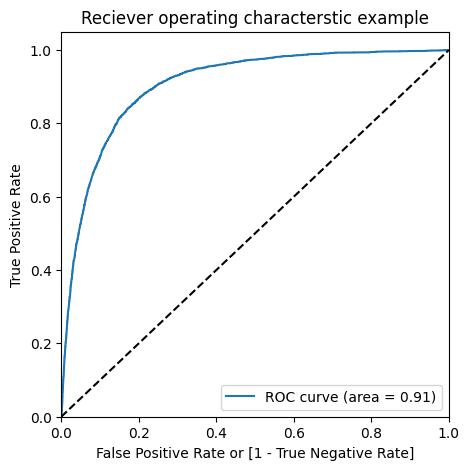

In [65]:
draw_roc(y_train_pred_final.Sub, y_train_pred_final.Sub_prob)

---
### Step 8: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [66]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Sub_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Sub,Sub_prob,Cust_id,predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.067934,18391,0,1,0,0,0,0,0,0,0,0,0
1,0,0.032915,13056,0,1,0,0,0,0,0,0,0,0,0
2,0,0.035706,13415,0,1,0,0,0,0,0,0,0,0,0
3,0,0.114470,21022,0,1,1,0,0,0,0,0,0,0,0
4,0,0.049401,24510,0,1,0,0,0,0,0,0,0,0,0


In [67]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs
cutoff = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final[i])
    total1= sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] = [i, accuracy, sensi, speci]
    
print(cutoff)

     prob  accuracy     sensi     speci
0.0   0.0  0.117231  1.000000  0.000000
0.1   0.1  0.816254  0.855256  0.811075
0.2   0.2  0.885992  0.674933  0.914021
0.3   0.3  0.899927  0.538544  0.947919
0.4   0.4  0.903561  0.436927  0.965530
0.5   0.5  0.902740  0.350404  0.976089
0.6   0.6  0.900117  0.274663  0.983176
0.7   0.7  0.896451  0.205121  0.988259
0.8   0.8  0.892786  0.140701  0.992662
0.9   0.9  0.887951  0.073046  0.996170


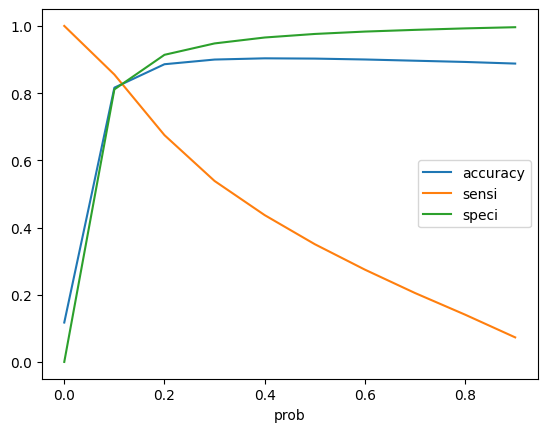

In [68]:
# Let's plot accuracy sensitivity and specificity for various probabilities
cutoff.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

---
#### From the curve above, 0.15 is the optimum point to take it as a cutoff probability

In [69]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Sub_prob.map(lambda x: 1 if x>0.15 else 0)
y_train_pred_final.head()

,Sub,Sub_prob,Cust_id,predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.067934,18391,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.032915,13056,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.035706,13415,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.114470,21022,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.049401,24510,0,1,0,0,0,0,0,0,0,0,0,0


In [70]:
metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.final_predicted)

0.8643789300723608

In [71]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.final_predicted)
confusion2

array([[24540,  3397],
       [  895,  2815]])

##### Confusion Matrix
Actual/Predicted|Non Sub|Sub
----------------|-------|---
**Non Sub**|2426|359
**Sub**|100|279

In [72]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [73]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.7587601078167115

In [74]:
# Let us calculate specificity
TN/float(TN+FP)

0.8784049826395103

In [75]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/float(TN+FP)

0.12159501736048968

In [76]:
# Positive predictive value 
TP/float(TP+FP)

0.45315518351577594

In [77]:
# Negative predictive value
TN/float(TN+ FN)

0.9648122665618243

---
## Precision and Recall

In [78]:
# Looking at the confusion matrix again
confusion

array([[27269,   668],
       [ 2410,  1300]])

In [79]:
# Second confusion matrix
confusion2

array([[24540,  3397],
       [  895,  2815]])

##### Precision
TP / TP + FP

In [80]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6605691056910569

##### Recall
TP / TP + FN

In [81]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.3504043126684636

---
#### Using sklearn utilities for finding precision and recall

In [82]:
precision_score(y_train_pred_final.Sub, y_train_pred_final.predict)

0.6605691056910569

In [83]:
recall_score(y_train_pred_final.Sub, y_train_pred_final.predict)

0.3504043126684636

---
## Step 9: Precision and Recall takeoff

In [84]:
y_train_pred_final.Sub, y_train_pred_final.predict

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 31642    0
 31643    0
 31644    0
 31645    0
 31646    0
 Name: Sub, Length: 31647, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 31642    0
 31643    0
 31644    0
 31645    0
 31646    0
 Name: predict, Length: 31647, dtype: int64)

In [85]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Sub, y_train_pred_final.Sub_prob)

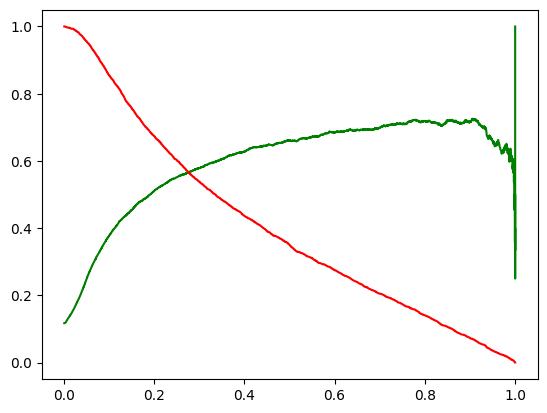

In [86]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

---
## Step 10: Making predictions on Test data

In [87]:
# transforming the test data
x_test[['age','balance','day','duration','campaign','pdays','previous']] = scaler.transform(x_test[['age','balance','day','duration','campaign','pdays','previous']])

In [88]:
x_test = x_test[col1]
x_test.head()

,housing,loan,duration,job_retired,job_student,education_secondary,education_tertiary,education_unknown,contact_unknown,month_aug,month_dec,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_success
14789,0,1,-0.403616,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
8968,0,0,-0.310613,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
34685,1,0,-0.740752,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2369,1,0,-0.213735,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
36561,1,0,1.444816,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [89]:
x_test_sm = sm.add_constant(x_test)

---
##### Making predictions on the test data 

In [90]:
y_test_pred = res.predict(x_test_sm)

In [91]:
y_test_pred[:10]

14789    0.031477
8968     0.047156
34685    0.029556
2369     0.009525
36561    0.728953
22611    0.069624
5137     0.138834
1491     0.027395
34610    0.043064
33988    0.072450
dtype: float64

In [92]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [93]:
y_pred_1.head()

,0
14789,0.031477
8968,0.047156
34685,0.029556
2369,0.009525
36561,0.728953


In [94]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [95]:
# Putting Cust_id to index
y_test_df['Cust_id'] = y_test_df.index

In [96]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [97]:
# Appending y_test_df and y_pred_1
y_pred = pd.concat([y_test_df,y_pred_1],axis=1)

In [98]:
y_pred.head()

,y,Cust_id,0
0,0,14789,0.031477
1,0,8968,0.047156
2,0,34685,0.029556
3,0,2369,0.009525
4,0,36561,0.728953


In [99]:
# renaming the columns
y_pred.rename(columns={'y':'Sub',0:'Sub_prob'},inplace=True)

In [100]:
y_pred.head()

,Sub,Cust_id,Sub_prob
0,0,14789,0.031477
1,0,8968,0.047156
2,0,34685,0.029556
3,0,2369,0.009525
4,0,36561,0.728953


In [101]:
# putting the limit of 0.25 from the precision_recall_curve
y_pred['final_predict'] = y_pred.Sub_prob.map(lambda x: 1 if x>0.25 else 0)

In [102]:
y_pred.head()

,Sub,Cust_id,Sub_prob,final_predict
0,0,14789,0.031477,0
1,0,8968,0.047156,0
2,0,34685,0.029556,0
3,0,2369,0.009525,0
4,0,36561,0.728953,1


In [103]:
# overall accuracy of the model on test data
metrics.accuracy_score(y_pred.Sub, y_pred.final_predict)

0.8900766735476261

In [104]:
confusion3 = metrics.confusion_matrix(y_pred.Sub, y_pred.final_predict)
confusion3

array([[11152,   833],
       [  658,   921]])

##### Confusion Matrix
Actual/Predicted|Non Sub|Sub
----------------|-------|---
**Non Sub**|1137|78
**Sub**|54|88

In [105]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [106]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.5832805573147561

In [107]:
# Let us calculate specificity
TN/float(TN+FP)

0.9304964539007092